### Loading data


In [348]:
import numpy as np
import pandas as pd
data = pd.read_csv('Data.csv')
# Loaded the dataset into a pandas DataFrame


### Normalize the data


In [349]:
data = pd.read_csv('Data.csv')
X_mean , Y_mean = data.mean()
X_std , Y_std = data.std()
data['X']= (data['X'] - X_mean)/X_std
shuffled_data = data.sample(frac=1)
print(shuffled_data)


            X         Y
308 -0.676894  1.426558
714 -1.075066  1.582203
987  1.054292  2.847100
240  0.122914  0.416005
500  0.455302  0.955510
..        ...       ...
248 -0.074441  2.128275
934  1.497475  3.904972
80  -0.825775  0.057753
675 -0.327194  1.328396
259 -1.597884 -2.542104

[1000 rows x 2 columns]


### TEST TRAIN SPLIT

In [350]:
split_ratio = 0.8
row_no, col_no = shuffled_data.shape
train_length = int(row_no*split_ratio)

Train = shuffled_data[:train_length]
Test = shuffled_data[train_length:]

X_Train = Train['X'].values
X_Test = Test['X'].values
Y_Test = Test['Y'].values
Y_Train = Train['Y'].values

## Poly Reg

In [351]:
import matplotlib.pyplot as plt
def poly_transform(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.insert(transform_data, i, transformed_feature, axis=1)
    return transform_data

[1.6071438086589078, 1.4855768675864376, 0.9001334029323271, 0.9397653855835716, 1.0098461089422444, 0.9861329899800553, 0.9657974723568961, 0.9735479263738602, 2.5249324057910706e+198]


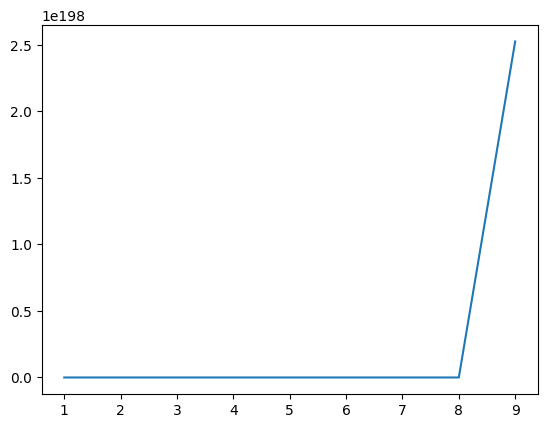

In [352]:
import numpy as np
import matplotlib.pyplot as plt
def bgd_regressor(train, test, learning_rate=0.0022, max_iters=500):
    X = train
    Y = test
    W = np.zeros(train.shape[1])
    n = len(train)
    for _ in range(max_iters):
        Y_pred = np.dot(X, W)
        gradient = np.dot(X.T, Y_pred - Y)
        change = (learning_rate / len(X)) * gradient
        W -= change
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output = []
for i in degrees:
    X_Train_poly = poly_transform(X_Train, i)
    X_Test_poly = poly_transform(X_Test, i)
    W = bgd_regressor(X_Train_poly, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly, W)
    mse = mean_squared_error(Y_Test, Y_Test_pred)
    output.append(mse)

print(output)
plt.plot(degrees, output)
plt.show()

## Task 2
 

### Loading data


In [353]:
import numpy as np
import pandas as pd
data = pd.read_csv('data2.csv')

### Normalize the data

In [354]:
data = pd.read_csv('data2.csv')
Height_mean , Width_mean , Weight_mean = data.mean()
Height_std , Width_std , Weight_std = data.std()
data['Height'] = (data['Height'] - Height_mean)/ Height_std
data['Width'] = (data['Width'] - Width_mean)/ Width_std
data = np.array(data)
np.random.shuffle(data)
print(data)

[[ 2.47073027e-01  9.49407279e-01  5.14000000e+02]
 [ 2.32979995e+00  1.29642274e+00  1.00000000e+03]
 [-1.35036322e-01 -8.89418729e-01  1.20000000e+02]
 [-1.42274809e+00 -1.39416309e+00  1.97000000e+01]
 [ 2.25476858e+00  1.38201988e+00  9.75000000e+02]
 [-7.04070819e-01 -4.67127611e-01  1.45000000e+02]
 [-2.19760028e-02  4.70484537e-02  2.90000000e+02]
 [-4.69177858e-01  2.83849429e-01  5.00000000e+02]
 [ 8.47603899e-01  2.20934032e+00  1.00000000e+03]
 [-8.79983903e-01 -7.67637065e-01  7.80000000e+01]
 [ 1.17444294e+00  2.52884973e-01  4.50000000e+02]
 [-7.61324229e-01 -1.53923917e-01  3.00000000e+02]
 [-6.42757877e-01 -5.00227547e-01  1.20000000e+02]
 [ 1.39596744e+00  4.46857715e-01  6.00000000e+02]
 [-1.63291057e+00 -1.93230398e+00  7.50000000e+00]
 [-3.16222132e-01  2.10056740e-01  3.20000000e+02]
 [-6.25866488e-01 -2.35902611e-01  3.00000000e+02]
 [ 1.21517825e+00  5.10744150e-01  5.00000000e+02]
 [-5.00674233e-01  2.46259165e-02  5.10000000e+02]
 [-4.39641258e-01 -3.03407498e-

## Split Data

In [355]:
n, m = data.shape
split_ratio = 0.8
Train_2 = data[:int(0.8*n),:]
Test_2 = data[int(0.8*n):,:]
X_Train = Train_2[:,:-1]
Y_Train = Train_2[:,-1]
X_Test = Test_2[:,:-1]
Y_Test = Test_2[:,-1]

In [356]:
import matplotlib.pyplot as plt
def poly_transform_2(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.concatenate((transform_data,transformed_feature), axis=1)
    return transform_data

## Regression with 0.5

In [361]:
def half_reg(X:np.ndarray, Y:np.ndarray,max_iter = 500 ,penalty = 0.07, learning_rate = 0.00018):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        Y_pred = np.dot(X,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
        if flag == False:
            grad = 1/n*np.dot(X.T, Y_pred-Y)
        else:
            grad = 1/n*np.dot(X.T, Y_pred-Y) + penalty*0.5*W**-0.5
        W -= learning_rate*grad
        learning_rate /=1.000005
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_trans_Train = poly_transform_2(X_Train,5)
X_trans_Test = poly_transform_2(X_Test,5)
W_half = half_reg(X_trans_Train,Y_Train)
y_pred = np.dot(X_trans_Test, W_half)
mse = mean_squared_error(Y_Test, y_pred)
print(mse)

143339.10314662033


In [ ]:
def one_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed = poly_transform_2(X,3)
W_one = one_deg(X_transformed, Y)
W_one
print(W_one)
Y_pred_one_deg = np.dot(X_transformed, W_one)

mse_one = mean_squared_error_one_deg(Y, Y_pred_one_deg)
print(mse_one)

[328.58112533  53.34018185 307.74259087  -2.47400611  69.48164358
   4.52773088 -19.63866065]
22128.003753290723
